In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 简单绘制

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

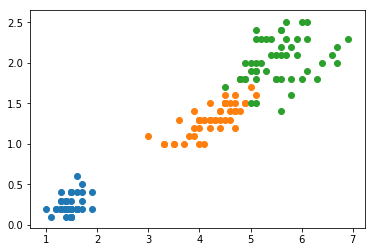

In [5]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2 ,criterion='entropy')
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
                   )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
                    
    plt.contourf(x0,x1,zz,cmap = custom_cmap)

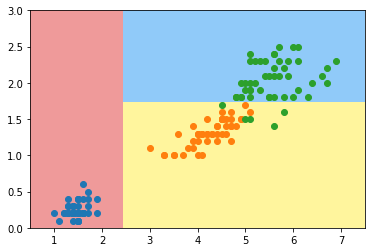

In [26]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

# 信息熵求解决策树

熵在信息论中代表随机变量的不确定度的度量 $$H=-\sum_{i=1}^{k}p_{i}log(p_{i})$$    
二分类的信息熵为 $$H=-xlog(x)-(1-x)log(1-x)$$

## 信息熵函数图像

In [28]:
def entropy(p):
    return -p*np.log(p) - (1-p)*np.log(1-p)

In [29]:
x = np.linspace(0.01,0.99,200)

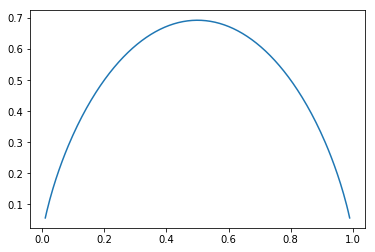

In [30]:
plt.plot(x,entropy(x))
plt.show()

在0.5的时候信息熵最大，最不确定

## matplotlib绘制3维entropy图像

# 使用信息熵寻找最优划分

In [66]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [82]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [83]:
def split(X,y,d,value): # d代表哪个feature
    index_a = (X[:,d]<=value) 
    index_b = (X[:,d] >value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

In [84]:
from collections import Counter
from math import log
def entropy(y): #计算熵值
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num/len(y)
        res +=-p*log(p)
    return res
def try_split(X,y):
    best_entropy = float('inf')
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])  #数值从大到小返回索引
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d]!= X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d])/2
                X_l,X_r,y_l,y_r =split(X,y,d,v)
                p_l,p_r = len(X_l)/len(X),len(X_r)/len(X)
                e = entropy(y_l) +entropy(y_r)
                if e < best_entropy:
                    best_entropy,best_d,best_v = e,d,v
    return best_entropy,best_d,best_v

In [85]:
try_split(X,y)

(0.6931471805599453, 0, 2.45)

# 基尼系数  $$G=1-\sum_{i=1}^{k} p_{i}^{2}$$    
基尼系数越低，确定性越强

In [87]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion='gini')
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

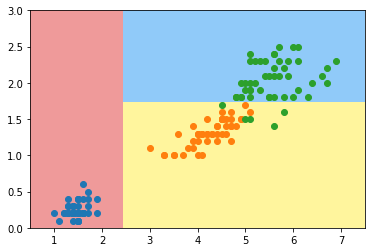

In [88]:
plot_decision_boundary(dt_clf,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

### 模拟使用基尼系数

In [94]:
from collections import Counter
from math import log
def split(X,y,d,value): # d代表哪个feature
    index_a = (X[:,d]<=value) 
    index_b = (X[:,d] >value)
    return X[index_a],X[index_b],y[index_a],y[index_b]

def gini(y):
    counter = Counter(y)
    res =1.0
    for num in counter.values():
        p = num/len(y)
        res -= p**2
    return res

def try_split(X,y):
    best_g = float('inf')
    best_d,best_v = -1,-1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])  #数值从大到小返回索引
        for i in range(1,len(X)):
            if X[sorted_index[i-1],d]!= X[sorted_index[i],d]:
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d])/2
                X_l,X_r,y_l,y_r =split(X,y,d,v)
                p_l,p_r = len(X_l)/len(X),len(X_r)/len(X)
                g = gini(y_l) +gini(y_r)
                if g < best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v

In [95]:
try_split(X,y)

(0.5, 0, 2.45)

熵信息的计算比基尼系数稍慢

sciki-learn中默认为基尼系数

大多数时候二者没有特别的效果优劣

# CART    
Classification And  Regression Tree

根据某一个维度d和某一个阈值v 来进行划分

sklearn中都是用CART实验；  其他的方式有ID3, C4.5,C5.0

* 预测 O(logm)

* 训练 O(n*m*logm)

* 剪枝：降低复杂度，解决过拟合

In [96]:
from sklearn import datasets

X,y = datasets.make_moons(noise=0.25,random_state=666)

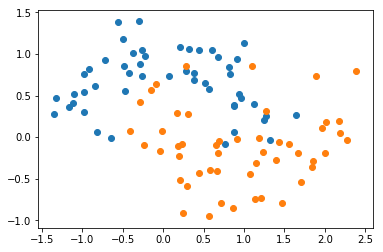

In [97]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

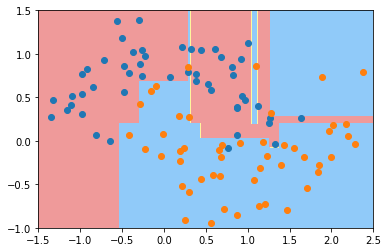

In [100]:
plot_decision_boundary(dt_clf,axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

max_depth = 2 减少过拟合

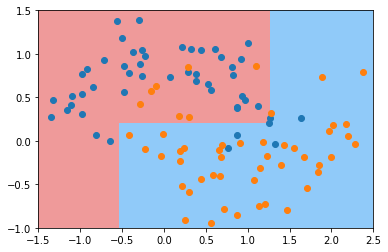

In [102]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X,y)

plot_decision_boundary(dt_clf2,axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

对于一个节点，至少要有多少数据我们才进行划分  min_samples_split参数

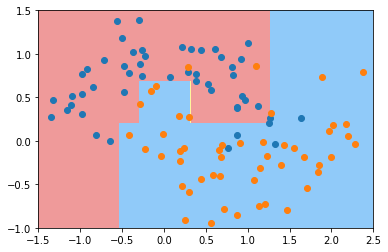

In [107]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10 )
dt_clf3.fit(X,y)

plot_decision_boundary(dt_clf3,axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

min_samples_leaf  对于叶子节点，有多少个样本

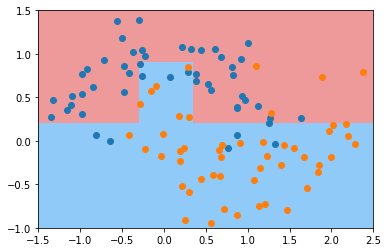

In [108]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6 )
dt_clf4.fit(X,y)

plot_decision_boundary(dt_clf4,axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

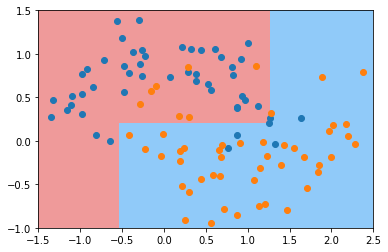

In [109]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4 )
dt_clf5.fit(X,y)

plot_decision_boundary(dt_clf5,axis = [-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()